# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

# Линейная диаграмма

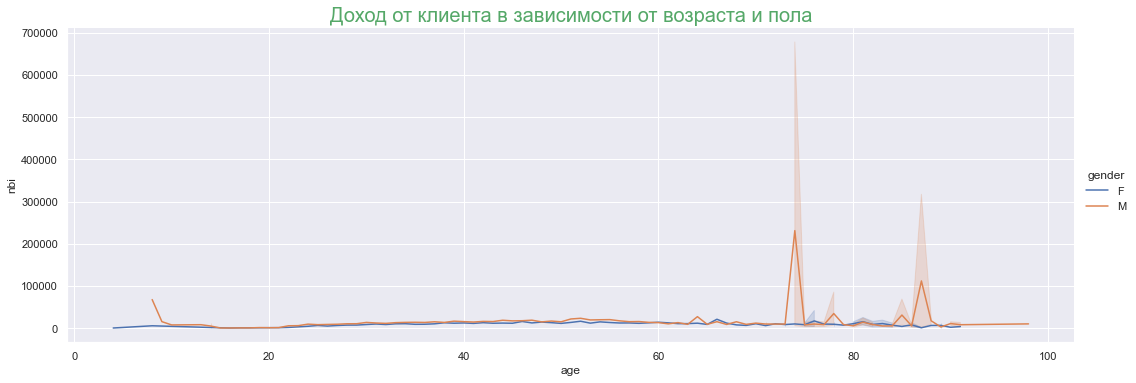

In [4]:
sns.set(style='darkgrid')

sns.relplot(
    x='age',
    y='nbi',
    hue='gender',
    hue_order=['F','М'],
    data=df,
    aspect = 3,
    kind='line'
)
plt.title('Доход от клиента в зависимости от возраста и пола', size=20, color='g');

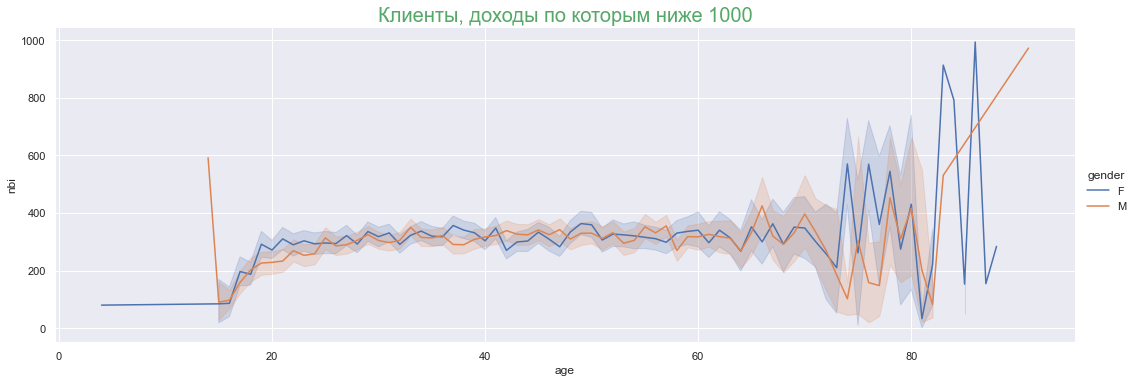

In [5]:
sns.set(style='darkgrid')
df1 = df.loc[df['nbi']<=1000]
sns.relplot(
    x='age',
    y='nbi',
    hue='gender',
    hue_order=['F','М'],
    data=df1,
    aspect = 3,
    kind='line'
)
plt.title('Клиенты, доходы по которым ниже 1000', size=20, color='g');

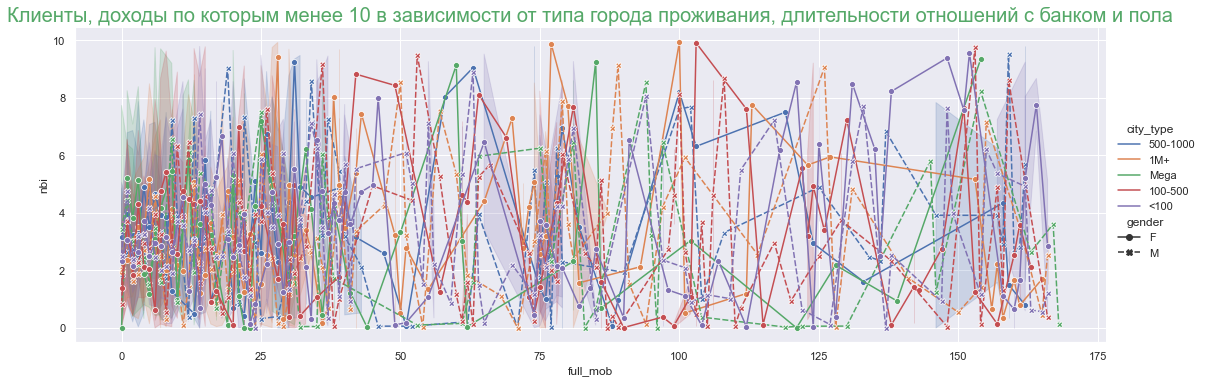

In [6]:
sns.set(style='darkgrid')
df1 = df.loc[df['nbi'] <= 10]
sns.relplot(
    x='full_mob',
    y='nbi',
    hue='city_type',
    style='gender', 
    style_order=['F','М'],
    data=df1,
    dashes=True,
    markers=True,
    aspect=3,
    kind='line',
    ci=99
)
plt.title('Клиенты, доходы по которым менее 10 в зависимости от типа города проживания, длительности отношений с банком и пола', size=20, color='g');

# Диаграмма рассеяния

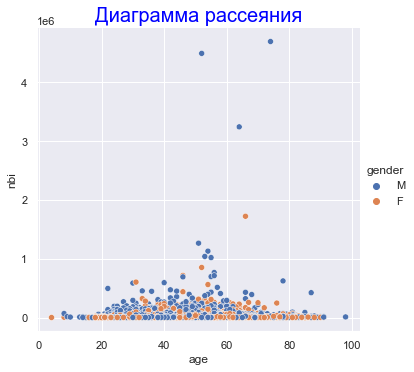

In [7]:
sns.relplot(
    x='age',
    y='nbi',
    hue='gender',
    data=df,
    kind='scatter'

)
plt.title('Диаграмма рассеяния', size=20, color='blue');

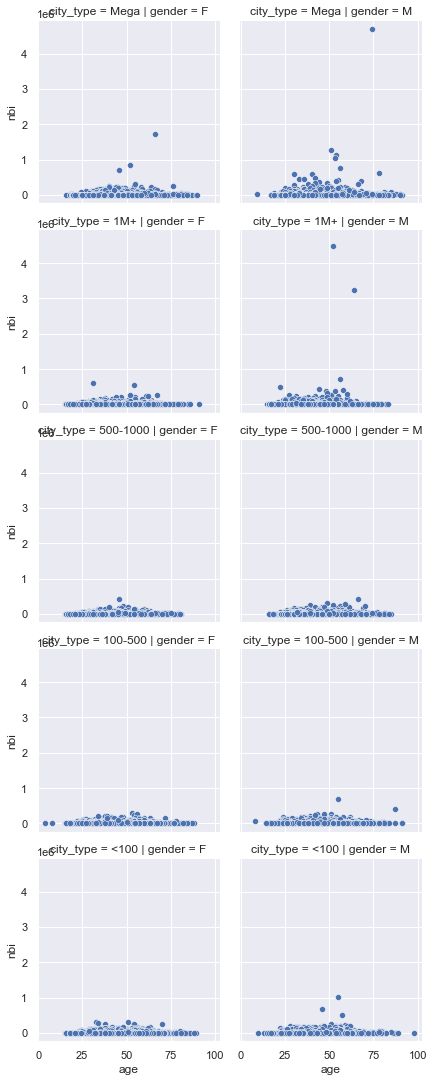

In [8]:
sns.relplot(
    x='age',
    y='nbi',
    col='gender',
    col_order=['F','М'],
    row='city_type',
    row_order=['Mega', '1M+', '500-1000', '100-500', '<100'],
    data=df,
    height=3
);

# Категорийные диаграммы

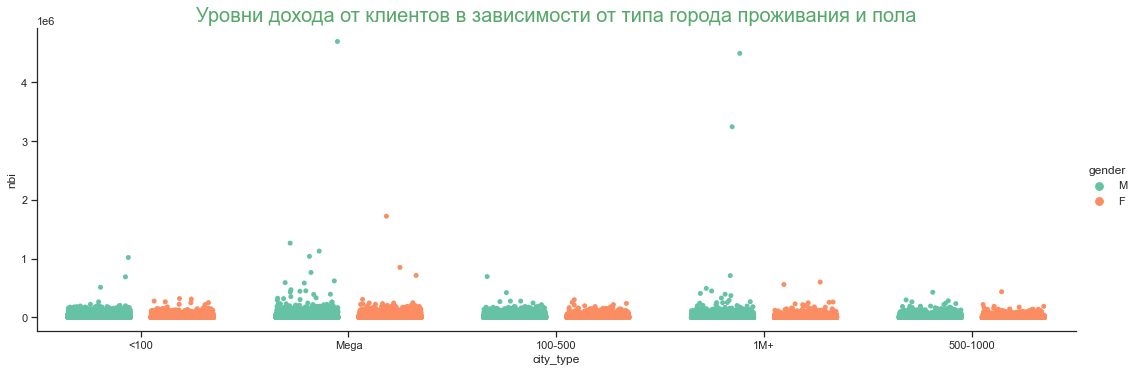

In [9]:
sns.set(style="ticks", color_codes=True)

sns.catplot(
    x='city_type',
    y='nbi',
    data=df,
    hue='gender',
    jitter=0.3,
    height=5,
    aspect=3,
    palette='Set2',
    kind='strip',
    dodge=True)
plt.title('Уровни дохода от клиентов в зависимости от типа города проживания и пола', size=20, color='g');

C:\Users\comp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\comp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\comp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\comp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\comp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.2% of the points cann

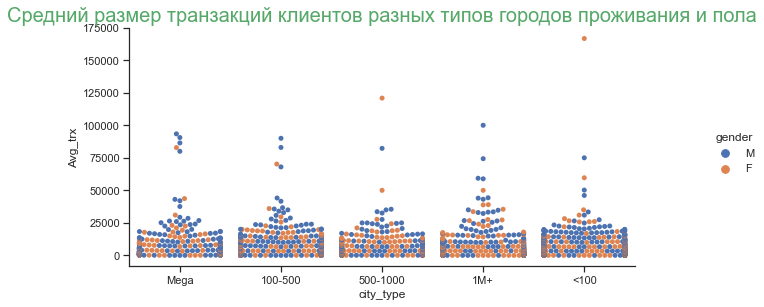

In [10]:
df2 = df.loc[df['nbi']<=100]
sns.catplot(
    x='city_type',
    y='Avg_trx',
    data=df2, 
    #order='gender', 
    hue='gender',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('Средний размер транзакций клиентов разных типов городов проживания и пола', size=20, color='g');

# Диаграмма размаха

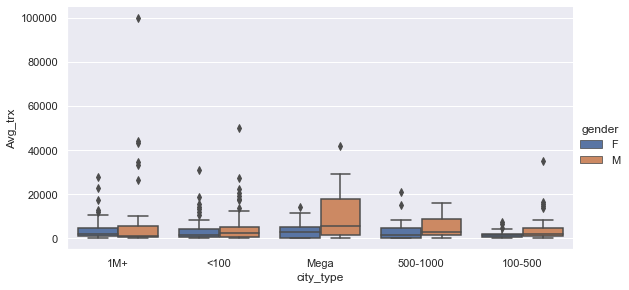

In [11]:
sns.set(style='darkgrid')

df2 = df.loc[df['nbi']<=1]
sns.catplot(
    x='city_type',
    y='Avg_trx',
    data=df2,
    kind='box',
    hue='gender',
    height=4,
    aspect=2
);

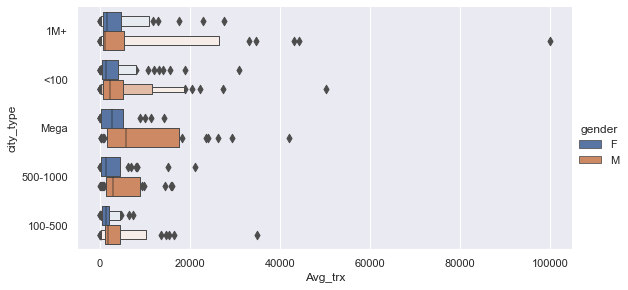

In [12]:
sns.set(style='darkgrid')

df2 = df.loc[df['nbi']<=1]
sns.catplot(
    y='city_type',
    x='Avg_trx',
    data=df2,
    kind='boxen',
    hue='gender',
    height=4,
    aspect=2
);

# Столбиковая диаграмма

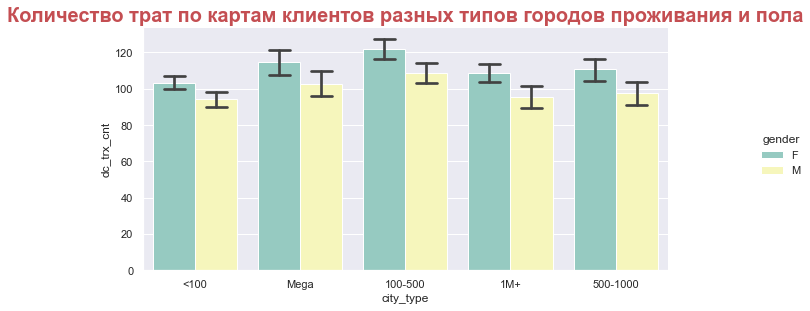

In [13]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df,
    kind='bar',
    hue='gender',
    hue_order=['F','М'],
    #palette={'F': "r", 'М': "indigo"},
    palette="Set3",
    capsize=0.2,
    height=4,
    aspect=2);

plt.title('Количество трат по картам клиентов разных типов городов проживания и пола', size=20, color='r', weight='bold');

# Горизонтальная диаграмма - виолончели

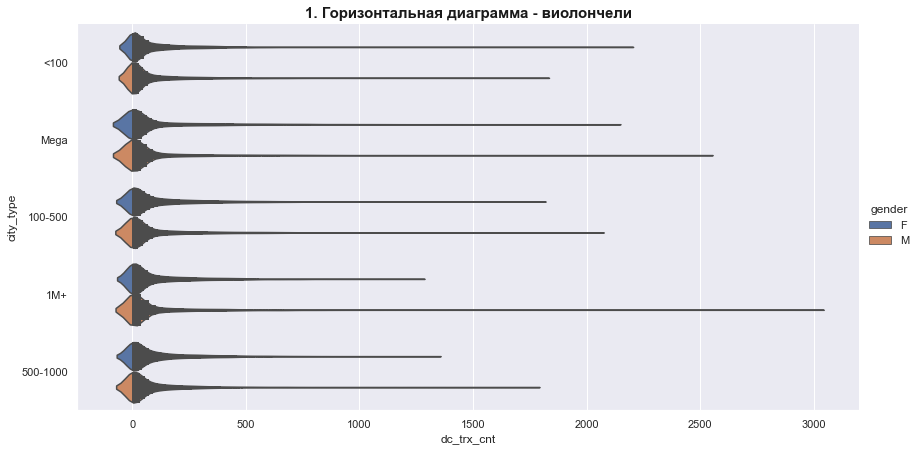

In [14]:
sns.catplot(
    y='city_type', 
    x='dc_trx_cnt',
    hue='gender',
    hue_order=['F','М'],
    data=df,
    kind='violin',
    inner="stick",
    height=6,
    aspect=2)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='k', weight='bold');

# Точечная диаграмма

In [15]:
df=pd.DataFrame(df)
def cut (fd):
    df['group_age'] = pd.cut(df['age'], bins=[0,30,60,199], labels=["до 30", "от 30 до 60", "свыше 60"])
    return df
cut(df)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,group_age
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,свыше 60
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,от 30 до 60
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,...,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539,от 30 до 60
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,от 30 до 60
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,свыше 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,...,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155,от 30 до 60
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,...,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438,от 30 до 60
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,...,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128711,от 30 до 60
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,...,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269,от 30 до 60


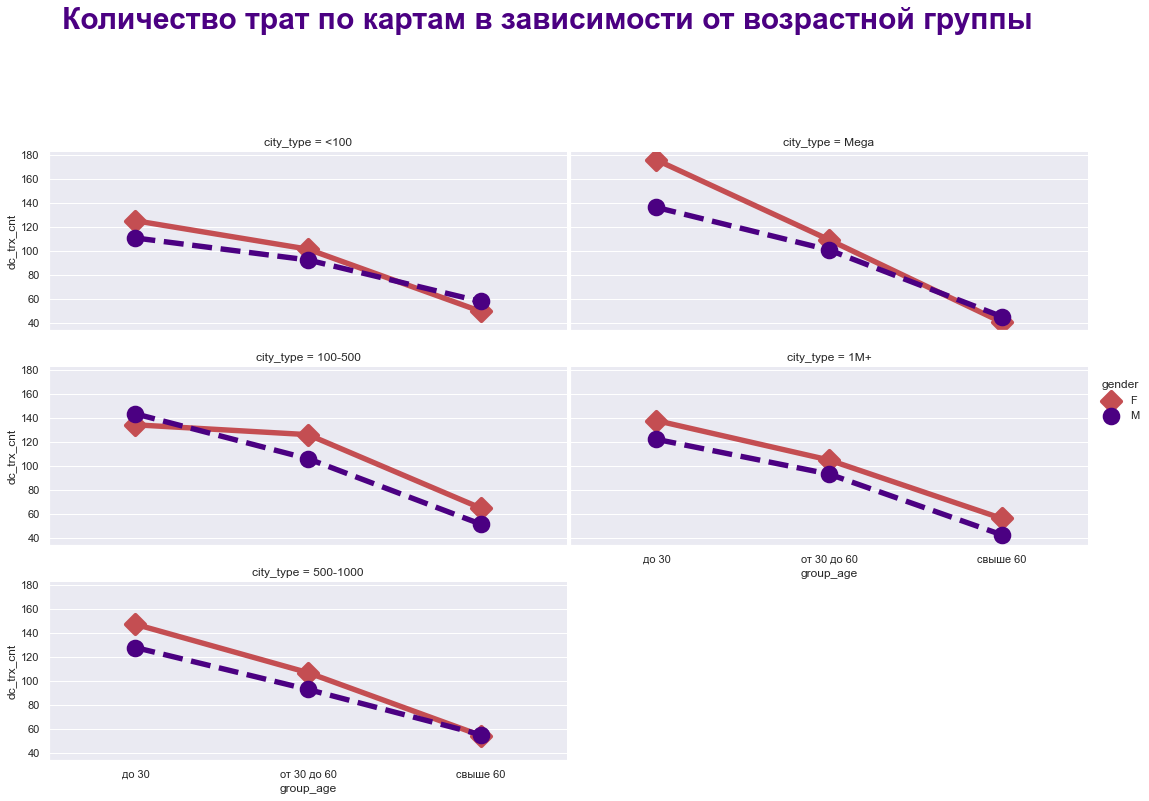

In [17]:
sns.catplot(
    x='group_age',
    y='dc_trx_cnt',
    data=df,
    kind='point',
    hue='gender',
    hue_order=['F','М'],
    palette={'F': "r", 'М': "indigo"},
    markers=["D", "o"],
    linestyles=["-", "--"],
    ci=None,
    col='city_type',
    col_wrap=2,
    height=4,
    aspect=2,
    scale=2)
plt.suptitle("Количество трат по картам в зависимости от возрастной группы", size=30, color='indigo', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

# Диаграммы распределения

C:\Users\comp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


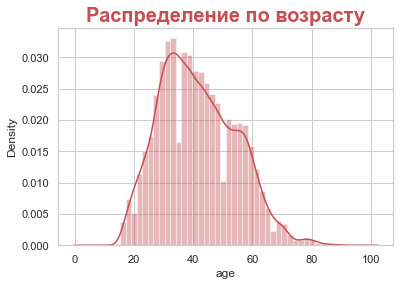

In [18]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.age,
    color='r',
    rug=False,
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('Распределение по возрасту', size=20, color='r', weight='bold')
plt.show();

C:\Users\comp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\comp\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


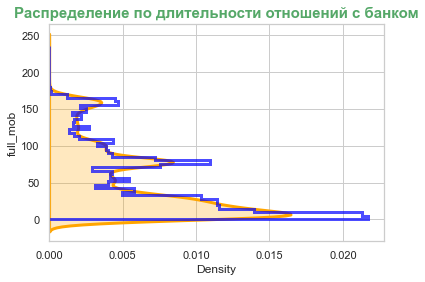

In [19]:
sns.distplot(
    df.full_mob,
    vertical=True,
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "blue", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})
plt.title('Распределение по длительности отношений с банком', size=15, color='g', weight='bold')             
plt.show();

# График распределения

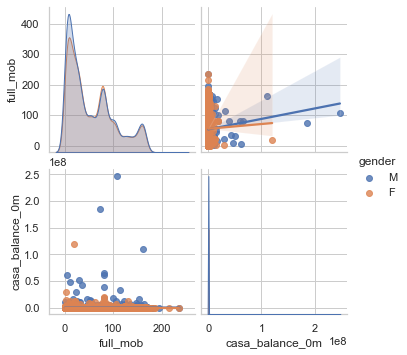

In [20]:
sns.pairplot(
    df,
    vars=['full_mob', 'casa_balance_0m'],
    hue='gender', kind='reg')
plt.show();

# Clustermaps

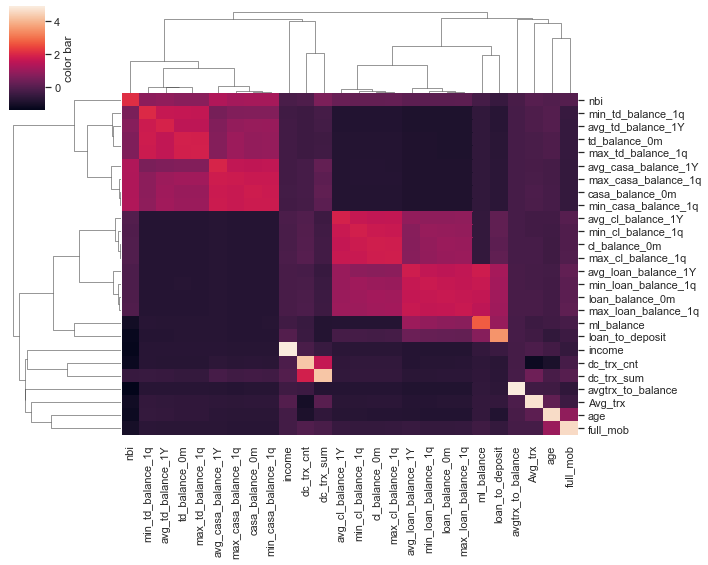

In [21]:
corr = df.corr()
g = sns.clustermap(
    corr,
    figsize=(10,8),
    z_score=1,
    cbar_kws={"label": "color bar"}
)

* age	возраст
* gender	пол
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам

* avg_casa_balance_1Y	показатели по счетам за год

* income	доход клиента
* nbi	доход от клиента без OPEX

In [22]:
fd = df[['age', 'gender', 'city_type', 'full_mob', 'dc_trx_cnt', 'dc_trx_sum', 'avg_casa_balance_1Y', 'income', 'nbi']].copy()
fd.head()

,age,gender,city_type,full_mob,dc_trx_cnt,dc_trx_sum,avg_casa_balance_1Y,income,nbi
0,71,NaN,<100,103,0,0.00,0.000000,0.0,NaN
1,49,NaN,Mega,81,0,0.00,4716.127317,0.0,28.762952
2,56,NaN,Mega,81,6,5128.02,10239.601283,0.0,1973.335539
3,47,NaN,Mega,81,0,0.00,13905.841283,0.0,364.008556
4,74,NaN,Mega,81,0,0.00,96089.612758,0.0,6651.416562


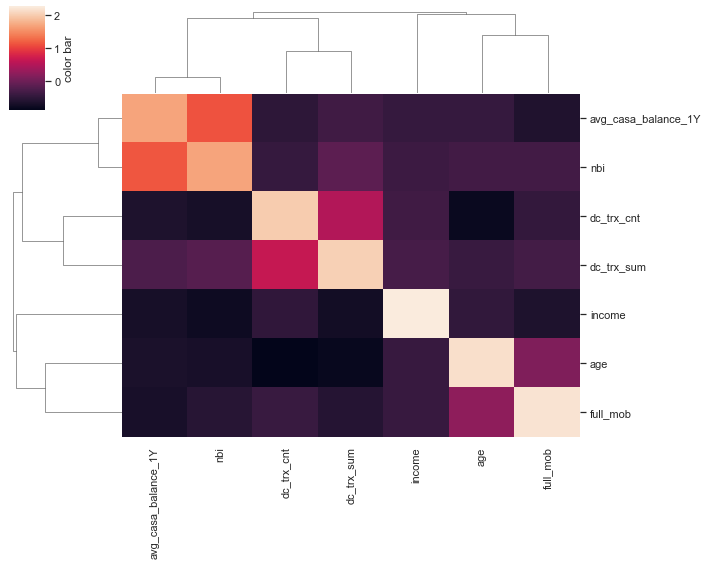

In [23]:
corr = fd.corr()
g = sns.clustermap(
    corr,
    figsize=(10,8),
    z_score=1,
    cbar_kws={"label": "color bar"}
)

* Кластер 1: возраст, доход клиента, длительность отношений с банком
* Кластер 2: количество и сумма трат по картам
* Кластер 3: показатели по счетам за год, доход от клиента